In [60]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import os
import tools

In [2]:
data = pd.read_csv('data.csv')

In [3]:
stats = pd.read_csv('stats.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'filename', 'name', 'hand', 'board', 'pf stack(bb)',
       '#pl pf', 'position pf', 'position pf/#pl pf', 'pf bets(bb)', 'pf agg',
       'stack/pfpot', 'hand strength pf', 'fl stack(bb)', '#pl fl',
       'position fl', 'position fl/#pl fl', 'fl bets(bb)', 'fl bets/pot',
       'fl agg', 'stack/flpot', 'hand strength fl', 'bluff flop',
       'tr stack(bb)', '#pl tr', 'position tr', 'position tr/#pl tr',
       'tr bets(bb)', 'tr bets/pot', 'tr agg', 'stack/trpot',
       'hand strength tr', 'bluff turn', 'rv stack(bb)', '#pl rv',
       'position rv', 'position rv/#pl rv', 'rv bets(bb)', 'rv bets/pot',
       'rv agg', 'stack/rvpot', 'hand strength rv', 'bluff river', 'tot bets',
       'tot agg', 'bets/stacks', 'street reached', 'cluster'],
      dtype='object')

In [5]:
stats.columns

Index(['Unnamed: 0', 'avgstack', 'net', 'foldpf', 'callpf', 'raisepf',
       'foldtoraisepf', 'numraisedpf', 'reraisepf', 'foldtoreraisepf',
       'numreraisedpf', 'numplayedpf', 'pctseenfl', 'foldfl', 'callfl',
       'betfl', 'raisefl', 'foldtoraisefl', 'numraisedfl', 'reraisefl',
       'foldtoreraisefl', 'numreraisedfl', 'numplayedfl', 'pctseentr',
       'foldtr', 'calltr', 'bettr', 'raisetr', 'foldtoraisetr', 'numraisedtr',
       'reraisetr', 'foldtoreraisetr', 'numreraisedtr', 'numplayedtr',
       'pctseenrv', 'foldrv', 'callrv', 'betrv', 'raiserv', 'foldtoraiserv',
       'numraisedrv', 'reraiserv', 'foldtoreraiserv', 'numreraisedrv',
       'numplayedrv', 'pctseensd', 'numplayedsd', 'winpercent', 'bb/100hands'],
      dtype='object')

In [10]:
tools.startinghandsequity(['As','Ad'], ['Ks','Kh'])

0.81714695692062378

object
         Unnamed: 0  filename   name   hand  board  pf stack(bb)  #pl pf  \
cluster                                                                    
0             27483     27483  27483  27483  27412         27483   27483   
1             14630     14630  14630  14630  14539         14630   14630   
2             82886     82886  82886  82886  82852         82886   82886   
3              7821      7821   7821   7821   7779          7821    7821   

         position pf  position pf/#pl pf  pf bets(bb)       ...        \
cluster                                                     ...         
0              27483               27483        27483       ...         
1              14630               14630        14630       ...         
2              82886               82886        82886       ...         
3               7821                7821         7821       ...         

         rv bets(bb)  rv bets/pot  rv agg  stack/rvpot  hand strength rv  \
cluster              

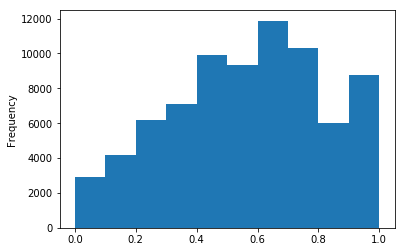

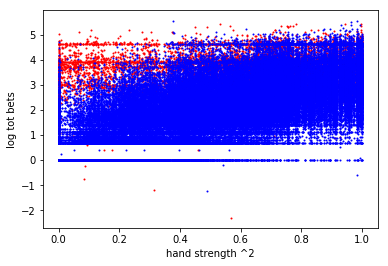

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv('data.csv')

#print(df['name'].value_counts())
print(df['board'].dtypes)
print(df.groupby('cluster').count())
#df = df[df['cluster'] == 3]
print(df.head())
print('shape', df.shape)
#df['board texture'] = df['board'].apply(hr.boardtexture)
df['hand strength ^2'] = df['hand strength rv'] ** 2
df['tot bets/stack'] = df['tot bets']/df['pf stack(bb)']
df['log tot bets'] = np.log(df['tot bets'])
df['log tot bets/stack'] = np.log(df['tot bets/stack'])
df['log tot agg'] = np.sqrt(df['tot agg'])
#df['pf agg'] = np.sqrt(df['pf agg'])
#df['rv agg'] = np.sqrt(df['rv agg'])
#df['tr agg'] = np.sqrt(df['tr agg'])
#df['fl agg'] = np.sqrt(df['fl agg'])
#df['rv bets(bb)'] = np.sqrt(df['rv bets(bb)'])
#df['tr bets(bb)'] = np.sqrt(df['tr bets(bb)'])
#df['fl bets(bb)'] = np.sqrt(df['fl bets(bb)'])
#df['pf bets(bb)'] = np.sqrt(df['pf bets(bb)'])
#df['rv bets/pot'] = np.sqrt(df['rv bets/pot'])
#df['tr bets/pot'] = np.sqrt(df['tr bets/pot'])
#df['fl bets/pot'] = np.sqrt(df['fl bets/pot'])

#print(df[df['hand strength ^2'] == 0])
print(df.columns)
df2 = df
df2 = df2[df2['street reached'] == 2]
df = df.dropna(axis = 0)
df = df[df['bluff river'] == 0]
df = df[df['bluff turn'] == 0]
#df = df[df['bluff flop'] == 0]
df = df[df['street reached'] == 3]
#df = df[df['pf stack(bb)'] > 80]
#df = df[df['straight draws flop'] == 0]
#df = df[df['flush draws flop'] == 0]
#df = df[df['straight draws turn'] == 0]
#df = df[df['flush draws turn'] == 0]
#print(df['bluff river'].value_counts())
print(df.corr()['hand strength ^2'].sort_values())
print(df[df['hand strength rv'].isnull()]['hand strength rv'])
df['hand strength ^2'].plot.hist()
#df['log tot bets'].plot.hist()
ax = df2.plot.scatter(x = 'hand strength ^2', y = 'log tot bets', s = 1, color = 'red')
df.plot.scatter(x = 'hand strength ^2', y = 'log tot bets', s = 1, color = 'blue', ax = ax)

X = df.drop(['filename','Unnamed: 0','street reached','name',
       'hand','board','hand strength fl','hand strength tr','hand strength rv',
       'hand strength ^2','bluff flop','bluff turn',
       'bluff river'], axis = 1)
#X = df[['log tot bets','log tot bets/stack','log tot agg',
#       'tot bets/stack','tot bets','rv bets(bb)','rv bets/pot',
#       'fl bets(bb)','fl bets/pot','tot agg','tr bets(bb)',
#       'tr bets/pot']]
y = df['hand strength ^2']
#print(X.columns)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X,y)
ss = StandardScaler()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
pipe = Pipeline([
    ('ss', ss),
    ('gbr', gbr)
])
params = {
        
}
gs = GridSearchCV(pipe, param_grid = params)
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)
print(gs.score(X_test, y_test))

z = pd.DataFrame(gs.predict(X_test))
z['test actual'] = list(y_test)

#z[0] = np.sqrt(z[0])
#z['test actual'] = np.sqrt(z['test actual'])
z['diff'] = z[0] - z['test actual']
print("median:", np.median(np.abs(z['diff'])))
print("std:", np.std(z['diff']))

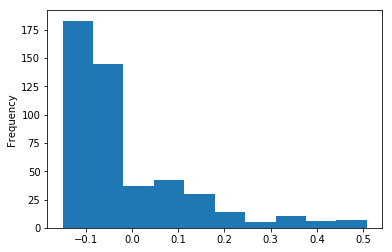

In [137]:
z[(z[0]<=1) & (z[0]>.85)]['diff'].plot.hist()
#z['diff'].plot.hist()

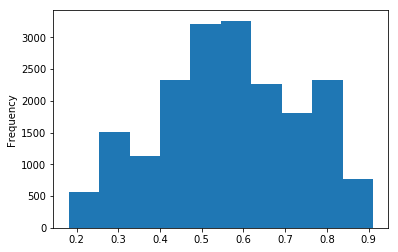

In [56]:
z[0].plot.hist()

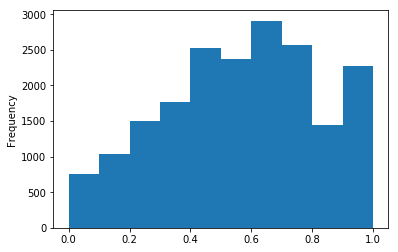

In [57]:
z['test actual'].plot.hist()

/Users/Vince/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/Vince/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


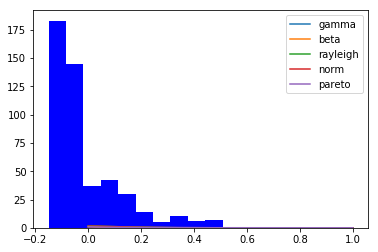

In [146]:
X = z[(z[0]<=1) & (z[0]>.85)]['diff']


dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(X)
    pdf_fitted = dist.pdf(np.linspace(0,1,len(X)), *param[:-2], loc=param[-2], scale=param[-1]) * max(X) 

    plt.plot(np.linspace(0,1,len(X)), pdf_fitted, label=dist_name)

#param = rayleigh.fit(z['test actual'])
plt.legend(loc='upper right')
plt.show()



In [84]:
print(np.linspace(0,1,len(z['test actual'])))

[  0.00000000e+00   5.22138680e-05   1.04427736e-04 ...,   9.99895572e-01
   9.99947786e-01   1.00000000e+00]


In [92]:
print(pdf_fitted)

[ 2.3456346   2.34518413  2.34473379 ...,  0.22647164  0.226453    0.22643435]


(408.31635200354503, -4.5951836632656562, 0.012639064369167979)


TypeError: _parse_args() missing 1 required positional argument: 'a'

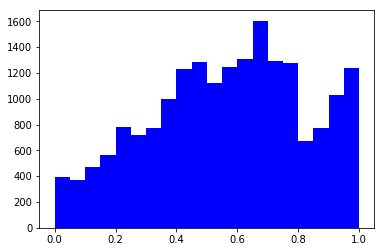

In [135]:
X = z['test actual']

h = plt.hist(X, bins = 20,color='blue')
dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

param = scipy.stats.gamma.fit(X)
print(param)
pdf_fitted = scipy.stats.gamma.pdf(np.linspace(0,1,len(X)), loc=param[-2], scale=param[-1]) * 1000
plt.plot(np.linspace(0,1,len(X)),pdf_fitted, label=dist_name)

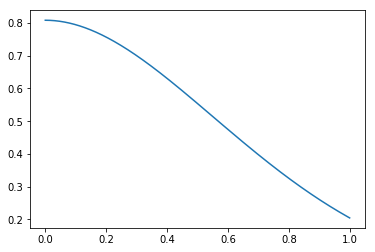

In [117]:
plt.plot(np.linspace(0,1,len(z['test actual'])),pdf_fitted, label=dist_name)

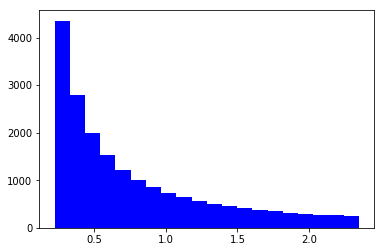

In [93]:
h = plt.hist(pdf_fitted, bins = 20,color='blue')

In [147]:
from scipy.stats import gamma

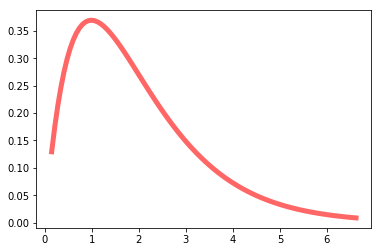

In [154]:
fig, ax = plt.subplots(1,1)
a = 1.99
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
x = np.linspace(gamma.ppf(0.01, a), gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),'r-', lw=5, alpha=0.6)

In [161]:
rv = gamma(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = gamma.ppf([0.001, 0.5, 0.999], a)
np.allclose([0.001, 0.5, 0.999], gamma.cdf(vals, a))

r = gamma.rvs(a, size=1000)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.5)
ax.legend(loc='best', frameon=False)
plt.show()

In [267]:
pred = .9

X = z[(z[0]<=pred + .1) & (z[0]>pred - .1)]['diff']

fit_alpha, fit_loc, fit_beta=gamma.fit(X)
print(fit_alpha, fit_loc, fit_beta)
# (5.0833692504230008, 100.08697963283467, 21.739518937816108)

#print(alpha, loc, beta)

1.76917418999 -0.200319951797 0.109099519321


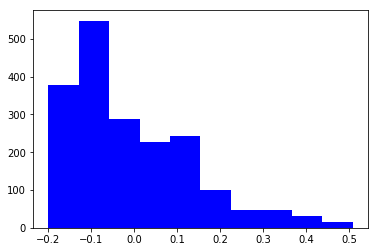

In [285]:
d = gamma.rvs(fit_alpha, loc=fit_loc, scale=fit_beta, size=700)

h = plt.hist(X, bins = 10,color='blue')

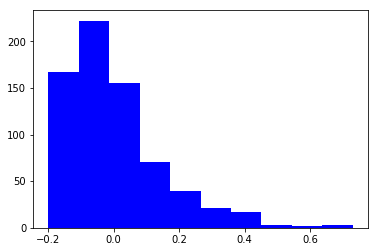

In [286]:
h = plt.hist(d, bins = 10,color='blue')

In [282]:
gamma.ppf(0,fit_alpha, loc=fit_loc, scale=fit_beta)

-0.20031995179661688

In [306]:
pfequity = pd.read_csv('./tables/totalequity.csv')#adjust pfequity from 0-1
pfequity = pfequity.drop('Unnamed: 0', axis = 1)
pfequity['1'] = pfequity['1'] - pfequity['1'].min()
pfequity['1'] = pfequity['1']/pfequity['1'].max()
pfequity = pfequity.set_index(['0'])

allpfequity = pd.read_csv('./tables/allequity.csv')
allpfequity = allpfequity.set_index('0')

In [307]:
print(pfequity)

            1
0            
AKs  0.664006
AQs  0.647740
AJs  0.631291
ATs  0.614975
A9s  0.579436
A8s  0.561447
A7s  0.541316
A6s  0.519630
A5s  0.517569
A4s  0.500936
A3s  0.486522
A2s  0.471640
AA   1.000000
AKo  0.632580
AQo  0.615332
AJo  0.597850
ATo  0.580485
A9o  0.542448
A8o  0.523135
A7o  0.501505
A6o  0.478177
A5o  0.475878
A4o  0.457753
A3o  0.441996
A2o  0.425692
KQs  0.595574
KJs  0.578841
KTs  0.562870
K9s  0.527876
K8s  0.494698
..        ...
76o  0.186998
75o  0.151461
74o  0.115317
73o  0.080414
72o  0.044366
65s  0.199466
64s  0.165939
63s  0.133698
62s  0.100518
66   0.600810
65o  0.139576
64o  0.103489
63o  0.068777
62o  0.033024
54s  0.166864
53s  0.135013
52s  0.102170
55   0.545865
54o  0.104778
53o  0.070486
52o  0.035092
43s  0.116495
42s  0.084006
44   0.485112
43o  0.050758
42o  0.015764
32s  0.069175
33   0.423752
32o  0.000000
22   0.361732

[169 rows x 1 columns]


In [322]:
import itertools

In [316]:
pfequity = pfequity.sort_values('1', ascending = False)

In [318]:
pfequity['rank'] = np.arange(len(pfequity['1']))

In [319]:
pfequity

,1,rank
0,,
AA,1.000000,0
KK,0.949462,1
QQ,0.904836,2
JJ,0.860323,3
TT,0.815565,4
99,0.761794,5
88,0.708856,6
AKs,0.664006,7
77,0.655132,8


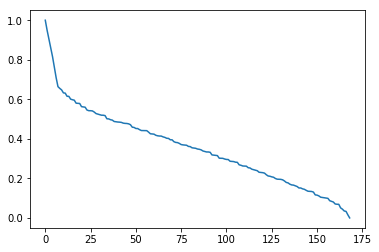

In [321]:
plt.plot(pfequity['rank'], pfequity['1'])